# CAR PRICE PREDICTION

**Input Features:** Description, Location, Manufacturer, Model, Year, FuelType, Kms Driven.

**Output:** Price

**Identifying Type:** Our model which is going to be Regression because our Target variable 'Price' is continuous.

### IMPORTING REQUIRED LIBRARIES

In [50]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression 
#from sklearn.linear_model import Lass
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [54]:
!pip install scikit-learn

In [59]:
from sklearn.linear_model import Lasso

### Loading Data

In [5]:
#Loading data
#Loaded .csv file and converted to dataframe.
df=pd.read_csv("car_data.csv")
df

,DESCRIPTION,LOCATION,MANUFACTURER,MODEL,YEAR,FUEL TYPE,KMS DRIVEN,PRICE
0,Maruti suzuki omni van,Bengaluru,Maruti Suzuki,Omni,2010,Petrol,24000.0,210000.0
1,Skoda Rapid 1.5 Tdi Cr Ambition (make Year 201...,Bengaluru,Skoda,Rapid,2012,Diesel,53000.0,530000.0
2,Hyundai Santro GL Plus,Bengaluru,Hyundai,Santro Xing,2013,Petrol,25400.0,315000.0
3,Chevrolet Beat Lt Petrol (make Year 2013) (pet...,Bengaluru,Chevrolet,Beat,2013,Petrol,26000.0,365000.0
4,Skoda Laura Elegance 2.0 Tdi Cr At (make Year ...,Bengaluru,Skoda,Laura,2010,Diesel,89000.0,790000.0
...,...,...,...,...,...,...,...,...
20000,Skoda Rapid Ambition 1.6 Tdi Cr Mt Plus (make ...,Delhi,Skoda,Rapid,2013,Diesel,58000.0,450000.0
20001,Renault Duster 110 Ps Rxz Diesel Plus (make Ye...,Delhi,Renault,Duster,2014,Diesel,50000.0,875000.0
20002,Mahindra Scorpio S10 (make Year 2015) (diesel),Delhi,Mahindra,Scorpio,2015,Diesel,12000.0,1365000.0
20003,Ford Figo (make Year 2011) (diesel),Delhi,Ford,Figo,2011,Diesel,36000.0,275000.0


In [6]:
# Name of the columns
df.columns

Index(['DESCRIPTION', 'LOCATION', 'MANUFACTURER', 'MODEL', 'YEAR', 'FUEL TYPE',
       'KMS DRIVEN', 'PRICE'],
      dtype='object')

In [7]:
#Checking shape
df.shape
#There are 20,005 rows and 8 columns

(20005, 8)

In [8]:
#checking the datatype of each column 
print(df.dtypes)

DESCRIPTION      object
LOCATION         object
MANUFACTURER     object
MODEL            object
YEAR              int64
FUEL TYPE        object
KMS DRIVEN      float64
PRICE           float64
dtype: object


In [9]:
#Information of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20005 entries, 0 to 20004
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DESCRIPTION   20005 non-null  object 
 1   LOCATION      20005 non-null  object 
 2   MANUFACTURER  20005 non-null  object 
 3   MODEL         20004 non-null  object 
 4   YEAR          20005 non-null  int64  
 5   FUEL TYPE     20005 non-null  object 
 6   KMS DRIVEN    20004 non-null  float64
 7   PRICE         20004 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


In [10]:
#Statistical info of the data.
df.describe().T

# Assuming no null values in data as count is constant.

,count,mean,std,min,25%,50%,75%,max
YEAR,20005.0,2012.097976,1.650501,2010.0,2011.0,2012.0,2013.00,2020.0
KMS DRIVEN,20004.0,56021.260198,50021.590743,1.0,30000.0,49000.0,69349.75,980000.0
PRICE,20004.0,609109.299190,635640.855613,15000.0,300000.0,450000.0,675000.00,18000000.0


### EDA (Exploratory Data Analysis)

In [11]:
#finding null values in the database
df.isnull().sum()

DESCRIPTION     0
LOCATION        0
MANUFACTURER    0
MODEL           1
YEAR            0
FUEL TYPE       0
KMS DRIVEN      1
PRICE           1
dtype: int64

We can see only 3 null values in the entire dataset, Which is negligible.

<AxesSubplot:>

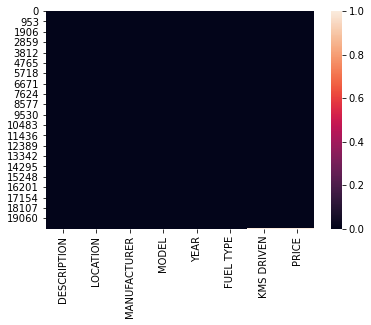

In [12]:
#Making Heatmap of null values
sns.heatmap(df.isnull())

In [13]:
#Removing nan values.
df.dropna(how='any',axis=0,inplace=True)

In [14]:
# count of the values based on LOCATION.
df['LOCATION'].value_counts()

Mumbai       4743
Bengaluru    4089
Chennai      3775
Hyderabad    3193
Kolkata      2502
Delhi        1701
Name: LOCATION, dtype: int64

In [15]:
# count of the values based on MANUFACTURER.
df['MANUFACTURER'].value_counts()

Maruti Suzuki       4747
Hyundai             3376
Tata                2266
Toyota              1456
Mahindra            1388
Honda               1365
Chevrolet           1092
Ford                1005
Volkswagen           987
Skoda                583
Renault              353
Nissan               313
BMW                  302
Mercedes-Benz        300
Audi                 265
Fiat                 141
Mitsubishi            40
Mahindra Renault      17
Hindustan Motors       7
Name: MANUFACTURER, dtype: int64

In [16]:
# count of the values based on MODEL.
df['MODEL'].value_counts()

I20            953
Swift          920
Swift Dzire    903
I10            784
Innova         725
              ... 
Gypsy            1
Cedia            1
Movus            1
X6 M             1
Lancer           1
Name: MODEL, Length: 205, dtype: int64

In [17]:
# count of the values based on YEAR.
df['YEAR'].value_counts()

2011    4541
2012    4380
2010    3836
2013    3039
2014    2133
2015    1433
2016     637
2017       3
2020       1
Name: YEAR, dtype: int64

In [18]:
# count of the values based on FUEL TYPE.
df['FUEL TYPE'].value_counts()

Diesel           11700
Petrol            7458
CNG & Hybrids      763
LPG                 82
Name: FUEL TYPE, dtype: int64

In [19]:
#Finding Correlation of the variables
df.corr()

,YEAR,KMS DRIVEN,PRICE
YEAR,1.000000,-0.266563,0.207416
KMS DRIVEN,-0.266563,1.000000,-0.042968
PRICE,0.207416,-0.042968,1.000000


Year has positive correlation with Price.  
Kms Driven has negative correlation over Price.

**CHECKING FOR OUTLIERS**

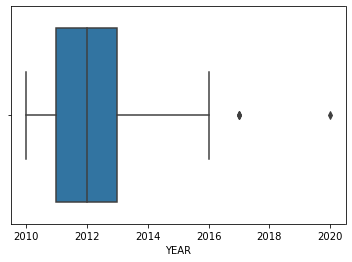

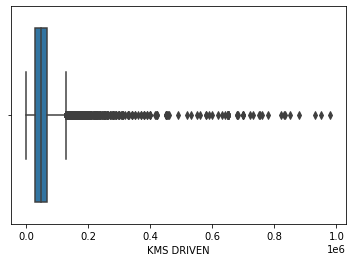

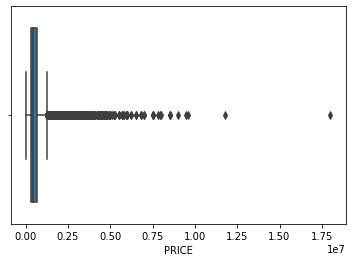

In [21]:
# Cheacking whether the columns has outliers or not
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

From below observation we can say, fewer outliers are present in the dataset.

**CHECKING FOR SKEWNESS**

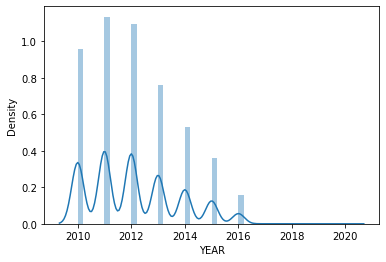

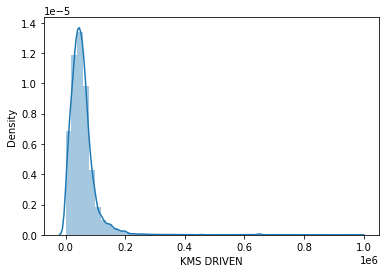

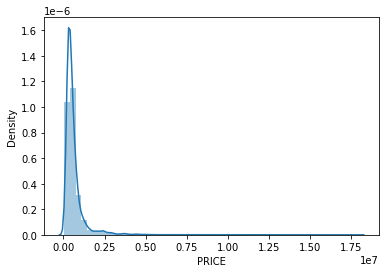

In [22]:
#checking wheather the columns are normally distributed or not

for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

In [23]:
#Skewness Values
df.skew()

YEAR          0.546710
KMS DRIVEN    6.541824
PRICE         5.506024
dtype: float64

KMS DRIVEN and PRICE are highly skewed data (Positively Skewed).

**SQUARE ROOT TRANSFORM TO REDUCE SKEWNESS**

In [24]:
df['KMS DRIVEN']=np.sqrt(df['KMS DRIVEN'])

In [25]:
df['KMS DRIVEN'].skew()

1.2463101889676276

In [26]:
df['PRICE']=np.sqrt(df['PRICE'])

In [27]:
df['PRICE'].skew()

2.20437436465942

The skew coefficient of KMS DRIVEN went from 6.5 to 1.24 and PRICE went from 5.5 to 2.2,  
which still is a notable difference. However, the Square root transformation ended with better results.

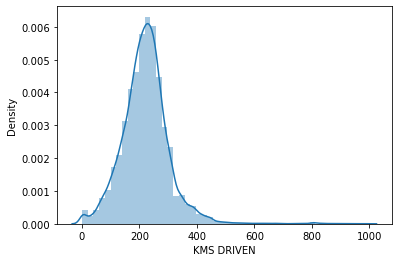

In [28]:
# Distribution plot after Transformation.
sns.distplot(df['KMS DRIVEN']);

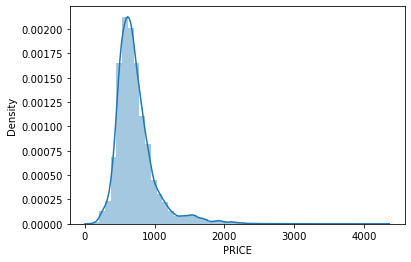

In [958]:
sns.distplot(df['PRICE']);

### Visualisation

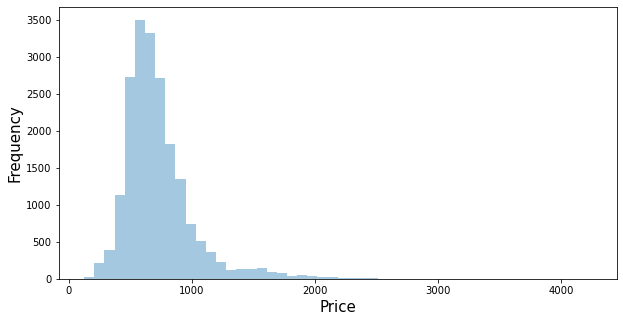

In [29]:
# Target Variable
plt.figure(figsize=(10,5))
sns.distplot(df["PRICE"],bins=50,kde=False )
plt.xlabel("Price", Size=15)
plt.ylabel("Frequency", Size=15)
plt.show()

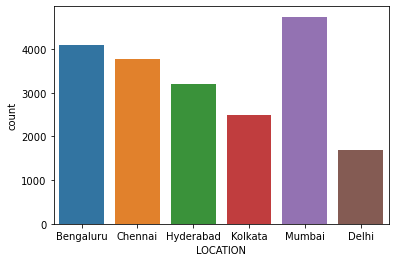

In [960]:
# UNIVARIATE ANALYSIS-COUNTPLOT OF LOCATION.
sns.countplot(x='LOCATION',data=df)
plt.show()

Car availability is higher at Mumbai and lowest at Delhi.  
Bengaluru and chennai has comparable values, followed by Hyderabad and kolkata. 

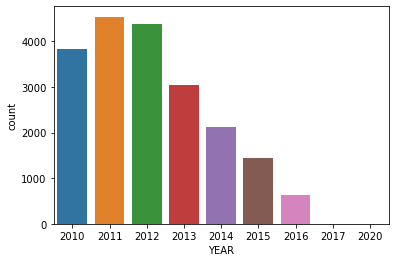

In [30]:
# UNIVARIATE ANALYSIS-COUNTPLOT OF YEAR.
sns.countplot(x='YEAR',data=df)
plt.show()

2011 and 2012 are the most sold models, more than 4000 cars.   
least availabe are the latest models 2015 and 2016.

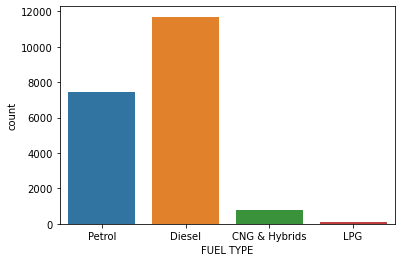

In [31]:
# UNIVARIATE ANALYSIS-COUNTPLOT OF FUEL TYPE.
sns.countplot(x='FUEL TYPE',data=df)
plt.show()

Diesel cars are sold most though fuel price is lower compared to petrol.  
CNG and LPG cars are least available in market.

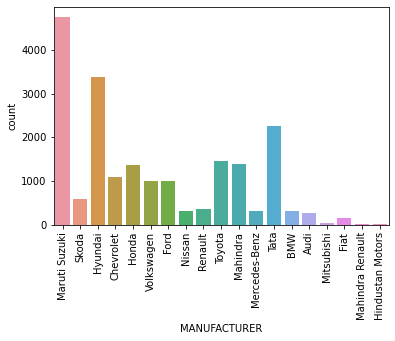

In [32]:
# UNIVARIATE ANALYSIS-COUNTPLOT OF FUEL TYPE.
sns.countplot(x='MANUFACTURER',data=df)
plt.xticks(rotation=90)
plt.show()

Maruti Suzuki is the highest available model in market more than 4500 cars available.  
Hyundai is second in line with more than 3500 cars followed by Tata numbers closed to 3000.  
All others are very less available.

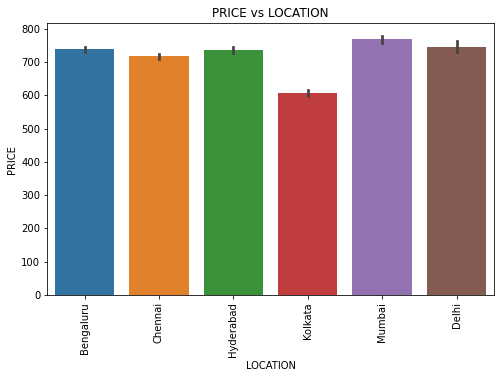

In [33]:
#Relation with target variables.
plt.figure(figsize=(8,5))
sns.barplot(y="PRICE", x="LOCATION", data=df)
plt.xticks(rotation=90)
plt.xlabel('LOCATION')
plt.ylabel('PRICE')
plt.title('PRICE vs LOCATION');

Most of the regions have approximately same price for cars except in kolkata is a little low.

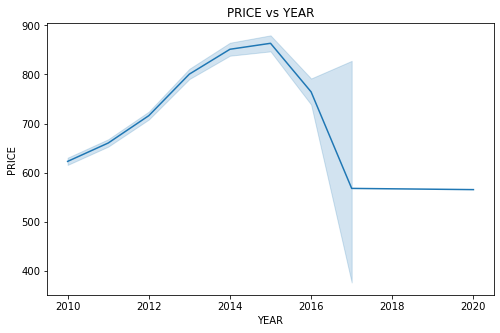

In [34]:
#Relation with target variables.
plt.figure(figsize=(8,5))
sns.lineplot(y="PRICE", x="YEAR", data=df)
plt.xlabel('YEAR')
plt.ylabel('PRICE')
plt.title('PRICE vs YEAR');

Price is higher for 2014 and 2016 models.

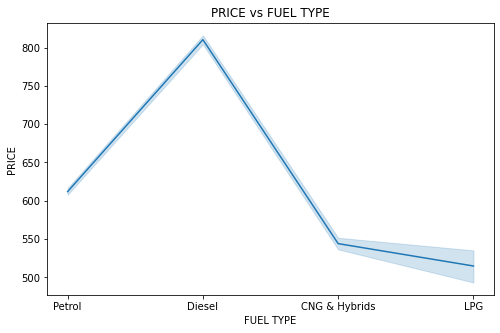

In [35]:
#Relation with target variables.
plt.figure(figsize=(8,5))
sns.lineplot(y="PRICE", x="FUEL TYPE", data=df)
plt.xlabel('FUEL TYPE')
plt.ylabel('PRICE')
plt.title('PRICE vs FUEL TYPE');

Price is higher for diesel vehicles whereas average for petrol and lowest for CNG and LPG.

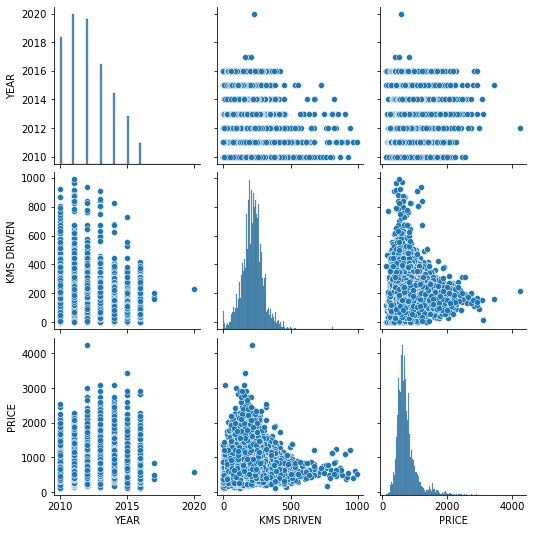

In [36]:
#Pair plot of numeric values
sns.pairplot(df);

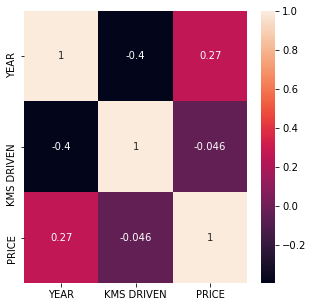

In [37]:
#Observing corelation between the columns through heatmap
##We observe positive correlation between AveragePrice and year and Kms Driven is negatively corelated

plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Data Preparation

In [38]:
#Removing unwanted column
df= df.drop('DESCRIPTION', axis=1)

#### Train Test Split

In [39]:
#SPLITTING AS TEST AND TRAIN DATA.
y= df['PRICE']
x= df.drop('PRICE', axis=1)

#### Creating dummy variables for categorical variables.

In [40]:
# subset all categorical variables
df_categorical = x.select_dtypes(include=['object'])
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
# drop categorical variables 
x = x.drop(list(df_categorical.columns), axis=1)
# concat dummy variables with x
x = pd.concat([x, df_dummies], axis=1)

#### Scaling the features and getting the final list of columns in dataframe for model building.

In [41]:
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols
x.columns

Index(['YEAR', 'KMS DRIVEN', 'LOCATION_Chennai', 'LOCATION_Delhi',
       'LOCATION_Hyderabad', 'LOCATION_Kolkata', 'LOCATION_Mumbai',
       'MANUFACTURER_BMW', 'MANUFACTURER_Chevrolet', 'MANUFACTURER_Fiat',
       ...
       'MODEL_Xuv500', 'MODEL_Xylo', 'MODEL_Yeti', 'MODEL_Z4', 'MODEL_Zen',
       'MODEL_Zen Estilo', 'MODEL_Zest', 'FUEL TYPE_Diesel', 'FUEL TYPE_LPG',
       'FUEL TYPE_Petrol'],
      dtype='object', length=232)

In [42]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =0.1, random_state=5)

### MODEL BUILDING

#### 1.Linear Regression

In [43]:
lm = LinearRegression()
# fit
lm.fit(x_train, y_train)
# predict 
y_pred = lm.predict(x_test)
train_data_pred= lm.predict(x_train)
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.9117274139042378


#### Visualizing Actual Prices and Predicted Prices.

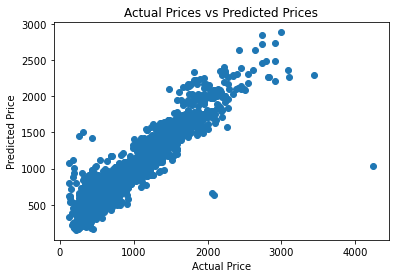

In [44]:
plt.scatter(y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices");

Most of the values we can see here are closer to each other.

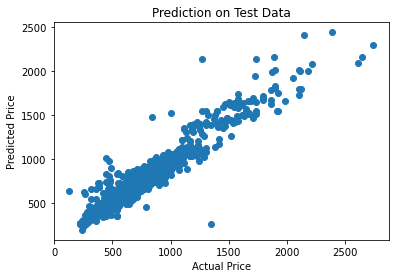

In [45]:
#Evaluating model on basis of test data
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on Test Data");

#### 2.Lasso Regression.

In [60]:
ls = Lasso()
# fit
ls.fit(x_train, y_train)
# predict 
y_pred1 = ls.predict(x_test)
train_data_pred1= ls.predict(x_train)
print(r2_score(y_true=y_test, y_pred=y_pred1))

0.9111059255458734


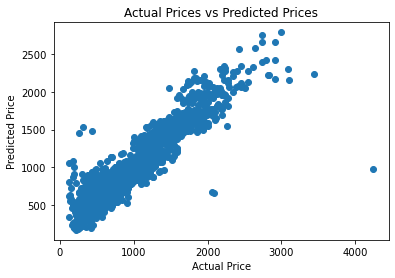

In [61]:
plt.scatter(y_train, train_data_pred1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices");

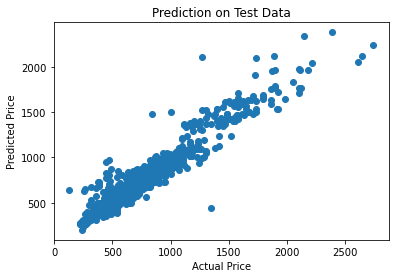

In [62]:
#Evaluating model on basis of test data
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Prediction on Test Data");

Values are slightly closer than Linear Regressor.

### Saving The Best Model

In [63]:
import pickle
# save the model to disk
filename = 'finalized_model_ls.pkl'
pickle.dump(ls,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([666.45951927, 675.96851202, 659.89825027, ..., 653.67304576,
       508.09058153, 688.08974107])